The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


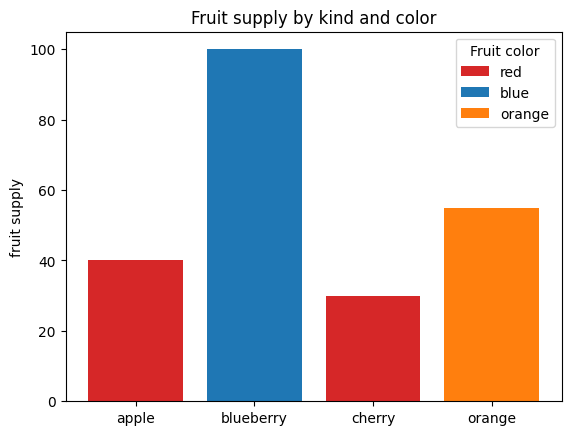

In [1]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

fruits = ['apple', 'blueberry', 'cherry', 'orange']
counts = [40, 100, 30, 55]
bar_labels = ['red', 'blue', '_red', 'orange']
bar_colors = ['tab:red', 'tab:blue', 'tab:red', 'tab:orange']

ax.bar(fruits, counts, label=bar_labels, color=bar_colors)

ax.set_ylabel('fruit supply')
ax.set_title('Fruit supply by kind and color')
ax.legend(title='Fruit color')

plt.savefig('graph.eps', format='eps', dpi=1200)

In [85]:

from scipy.spatial import ConvexHull

import numpy as np

def Y(r):
    return np.array((1+2*r,2))

def Z(r):
    return np.array((4*r,5*r))

def X(r):
    return np.array((3-3*r, 5))

def W(r):
    return np.array((r,1-r))

def graph_bargaining_set(plt, r, offsets=[(0,0),(0,0),(0,0),(0,0)]):
    graph_convex_hull(plt, np.array([X(r),Y(r),Z(r),W(r)]), offsets)
    plt.xlabel(r'$g_A$')
    plt.ylabel(r'$g_B$')
    plt.title(r'r = ' + str(r))
    # return plt

def threat_point(r):
    if r > 3/7:
        return np.array(((11 * r * r + r)/(8 * r - 2), 2))
    else:
        return np.array((4*r, 2))

def graph_threat_point(plt, r, xmax, ymax):
    color = "blue"
    plt.plot(*threat_point(r), 'X', color=color)
    plt.annotate(r'$\tau$',(threat_point(r) + (-0.2, 0)), color=color)
    plt.plot((threat_point(r)[0],threat_point(r)[0]), (threat_point(r)[1],ymax), "--", color=color, alpha=0.5)
    plt.plot((threat_point(r)[0],xmax), (threat_point(r)[1],threat_point(r)[1]), "--", color=color, alpha=0.5)

    

def graph_convex_hull(plt, points, offsets=[(0,0),(0,0),(0,0),(0,0)], labels=['X','Y','Z','W']):
    hull = ConvexHull(points)
    plt.plot(points[:,0], points[:,1], 'o', color="black")
    for i in range(len(labels)):
        label = labels[i]
        point = points[i]
        offset = offsets[i]
        plt.annotate(label, point + (-0.05,0.2) + offset)
    
    for simplex in hull.simplices:
        plt.plot(points[simplex, 0], points[simplex, 1], 'k-')
        plt.fill(points[hull.vertices,0], points[hull.vertices,1], 'k', alpha=0.1, color="orange")
    # return plt



#plt = graph_convex_hull(plt, np.array([[0,0],[4,1],[1,1],[1,0], [1,0.4]]))

C:\Users\akesh\AppData\Local\Temp\ipykernel_6480\2185498289.py:50: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.fill(points[hull.vertices,0], points[hull.vertices,1], 'k', alpha=0.1, color="orange")


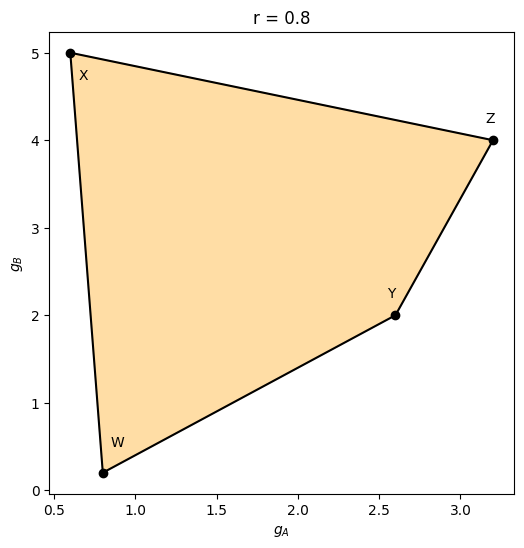

In [89]:
import matplotlib.pyplot as plt

r = 0.8
plt.rcParams["figure.figsize"] = (6,6)
graph_bargaining_set(plt,r, [(0.1,-0.5),(0,0),(0,0),(0.1, 0.1)])
plt.show()


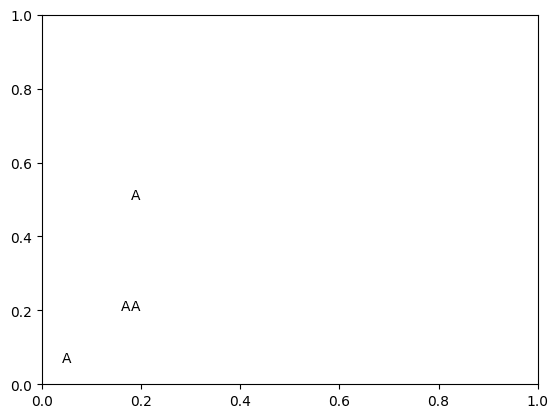

In [47]:
r = 0.4
points = np.array([X(r),Y(r),Z(r),W(r)])
# plt.text(points[:,0], points[:,1], "X", fontsize=9)
ax = plt.gca()
for point in points:
    ax.annotate('A', point/10)
plt.show()

0
[0 2]


C:\Users\akesh\AppData\Local\Temp\ipykernel_6480\2185498289.py:50: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.fill(points[hull.vertices,0], points[hull.vertices,1], 'k', alpha=0.1, color="orange")


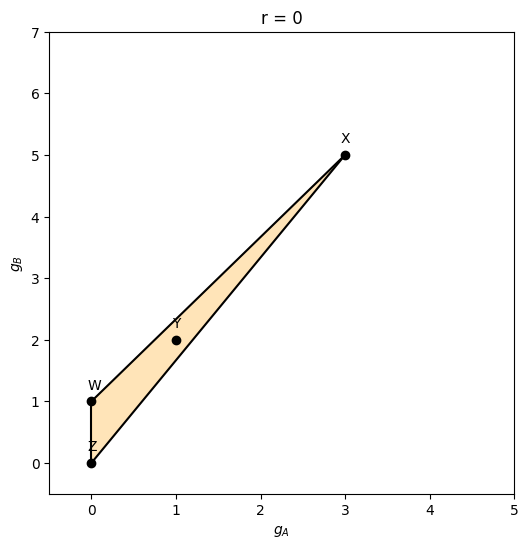

0.4
[1.6 2. ]


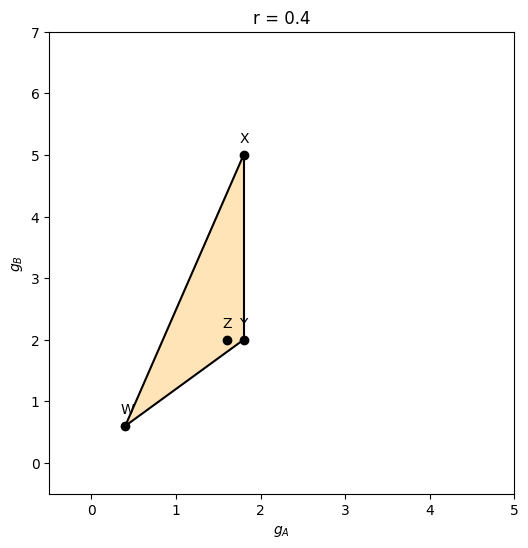

0.42857142857142855
[1.71428571 2.        ]


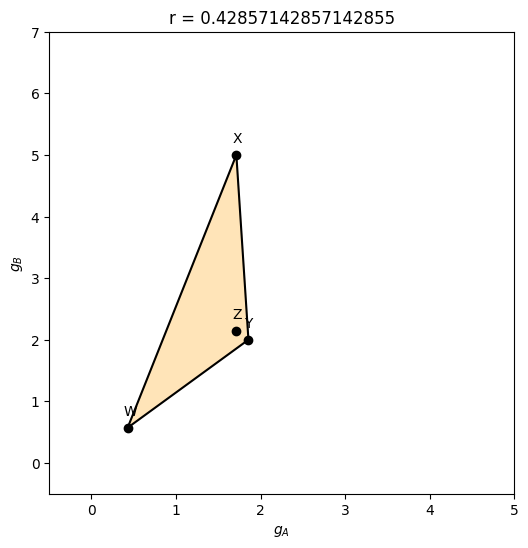

0.47
[1.64767045 2.        ]


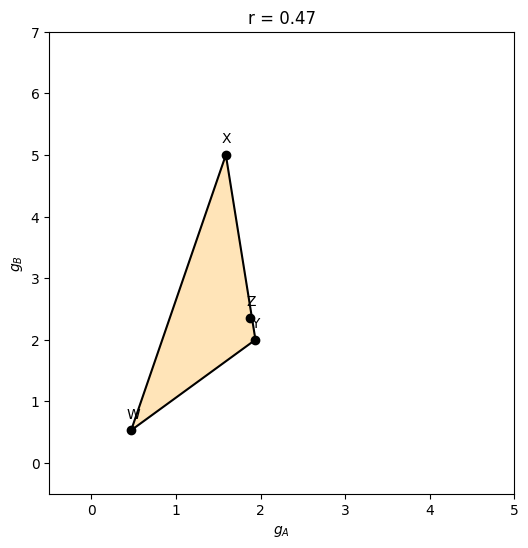

0.5
[1.625 2.   ]


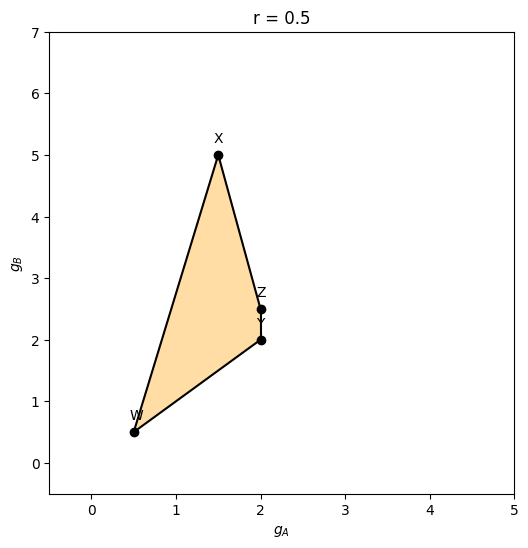

0.78
[1.76235849 2.        ]


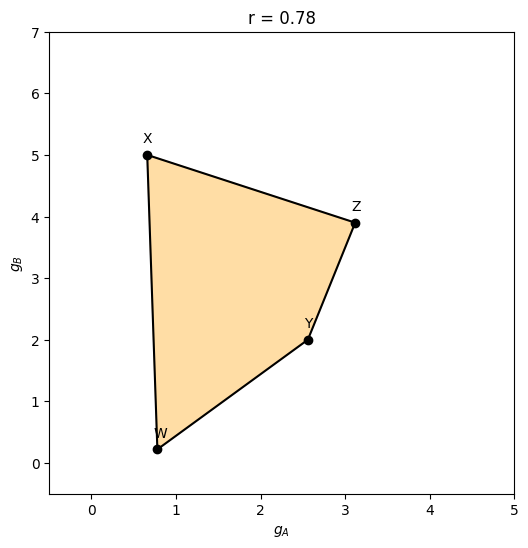

1
[2. 2.]


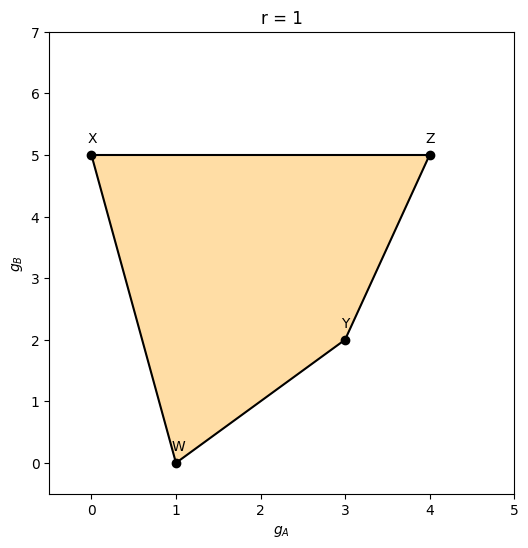

In [97]:
rs = [0, 0.4, 3/7, 0.47, 0.5, 0.78, 1]

for r in rs:
    plt.rcParams["figure.figsize"] = (6,6)
    xmax = 5
    ymax = 7
    plt.xlim(-0.5, xmax)
    plt.ylim(-0.5, ymax)
    print(r)
    print(threat_point(r))
    graph_bargaining_set(plt, r)
    
    plt.savefig(f'graphics/graph_{round(r,3)}.svg', format='svg', dpi=1200)
    plt.show()

0
[0 2]


C:\Users\akesh\AppData\Local\Temp\ipykernel_6480\2185498289.py:50: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.fill(points[hull.vertices,0], points[hull.vertices,1], 'k', alpha=0.1, color="orange")


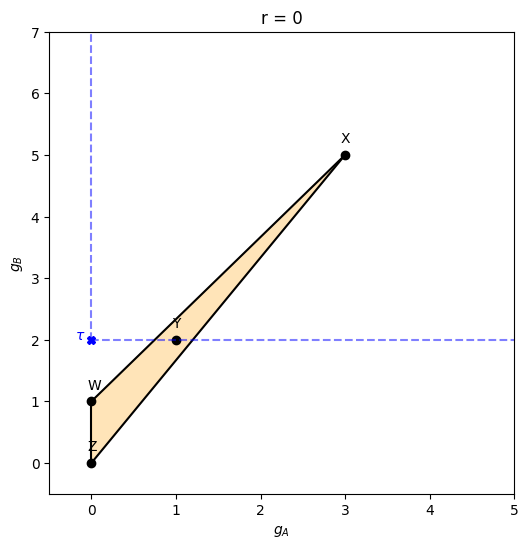

0.4
[1.6 2. ]


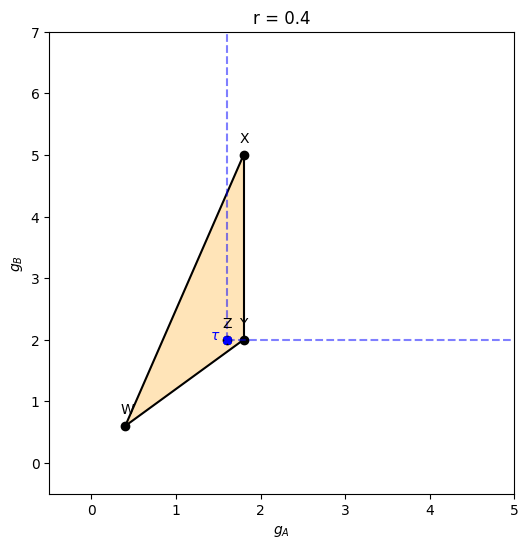

0.42857142857142855
[1.71428571 2.        ]


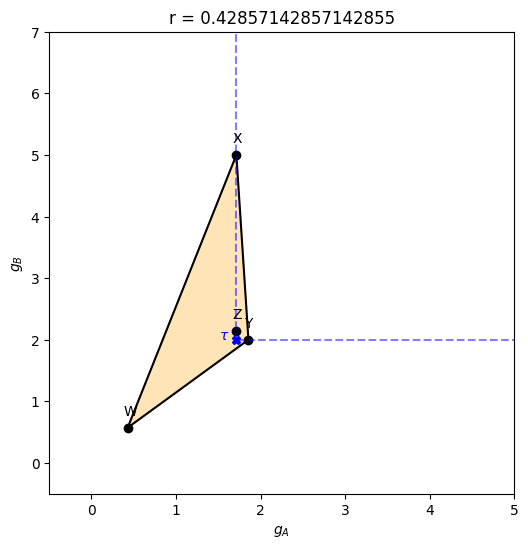

0.47
[1.64767045 2.        ]


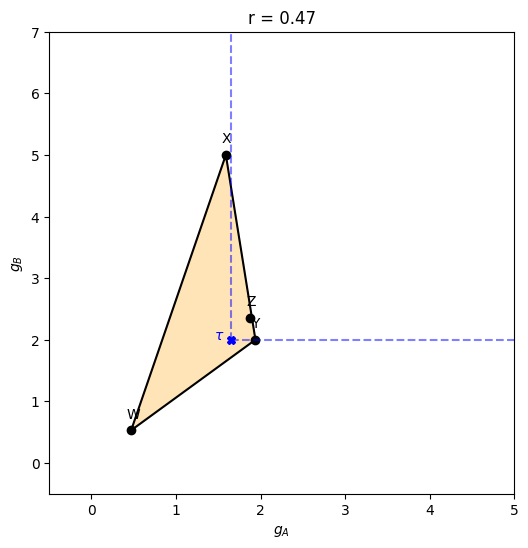

0.5
[1.625 2.   ]


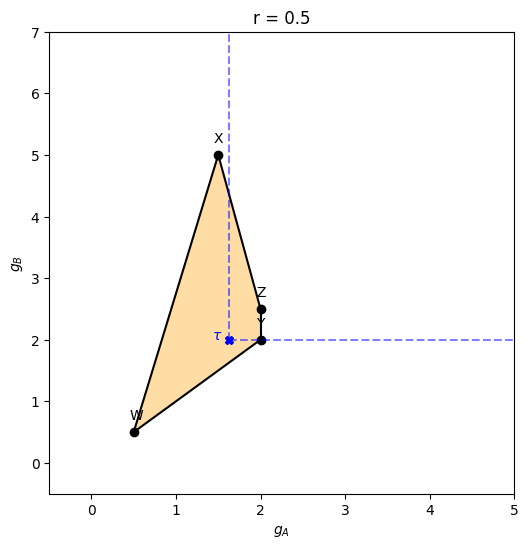

0.78
[1.76235849 2.        ]


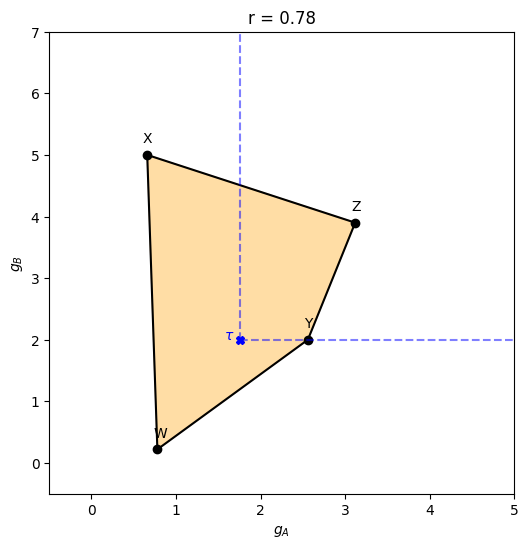

1
[2. 2.]


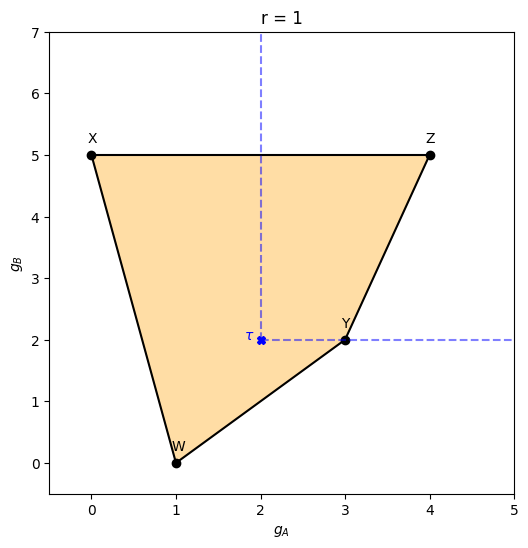

In [98]:
rs = [0, 0.4, 3/7, 0.47, 0.5, 0.78, 1]

for r in rs:
    plt.rcParams["figure.figsize"] = (6,6)
    xmax = 5
    ymax = 7
    plt.xlim(-0.5, xmax)
    plt.ylim(-0.5, ymax)
    print(r)
    print(threat_point(r))
    graph_bargaining_set(plt, r)
    graph_threat_point(plt, r,xmax, ymax)
    
    #plt.show()
    plt.savefig(f'graphics/graph_threat_{round(r,3)}.svg', format='svg', dpi=1200)
    plt.show()
    

In [100]:
rs = [0, 0.4, 3/7, 0.47, 0.5, 0.78, 1]

for r in rs:
    plt.rcParams["figure.figsize"] = (6,6)
    xmax = 5
    ymax = 7
    plt.xlim(threat_point(r)[0]-0.1, xmax)
    plt.ylim(threat_point(r)[1]-0.1, ymax)
    print(r)
    print(threat_point(r))
    graph_bargaining_set(plt, r)
    graph_threat_point(plt, r,xmax, ymax)
    
    #plt.show()
    plt.savefig(f'graphics/graph_threat_zoom_{round(r,3)}.svg', format='svg', dpi=1200)
    plt.close()
    

0
[0 2]
0.4
[1.6 2. ]


C:\Users\akesh\AppData\Local\Temp\ipykernel_6480\2185498289.py:50: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.fill(points[hull.vertices,0], points[hull.vertices,1], 'k', alpha=0.1, color="orange")


0.42857142857142855
[1.71428571 2.        ]
0.47
[1.64767045 2.        ]
0.5
[1.625 2.   ]
0.78
[1.76235849 2.        ]
1
[2. 2.]
